In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import auc

In [ ]:
# Import results
path = "./results"
results = os.listdir(path)

# Choose which to plot
r_path = f"{path}/compl71-ESS1.csv"
r = pd.read_csv(r_path).drop("Unnamed: 0", axis=1)

n_bns = r.shape[1] - 3
r_bns = r.iloc[:,-n_bns:]
r_bns.head()

,power_BN_v_0,power_BN_v_1,power_BN_v_2,power_BN_v_3,power_BN_v_4,power_BN_v_5,power_BN_v_6,power_BN_v_7,power_BN_v_8,power_BN_v_9
0,0.000600,0.000600,0.000600,0.000600,0.000600,0.000600,0.000600,0.000600,0.000600,0.000600
1,0.057023,0.055222,0.054622,0.055822,0.054622,0.055822,0.057623,0.055222,0.055222,0.057023
2,0.121849,0.120648,0.123049,0.124250,0.121849,0.121248,0.123049,0.123649,0.121248,0.121849
3,0.171068,0.171068,0.168667,0.173469,0.173469,0.171669,0.169268,0.171669,0.169868,0.171068
4,0.220288,0.216086,0.220888,0.220888,0.216687,0.219088,0.220888,0.217287,0.216687,0.218487


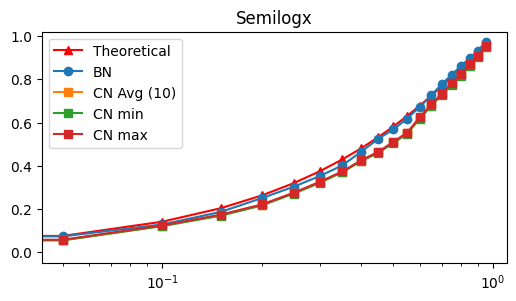

In [14]:
## Plot: error vs power
fig, ax = plt.subplots(1,1, figsize=(6, 3))

# Theoretical bound
ax.semilogx(r["error"], r["power_bound"], "r-^", label = 'Theoretical')

# BN
ax.semilogx(r["error"], r["power_BN"], "-o", label = 'BN')

# CN (avg, min, max)
ax.semilogx(r["error"], r_bns.mean(axis=1), "-s", label = f'CN Avg ({n_bns})')
ax.semilogx(r["error"], r_bns.min(axis=1), "-s", label = 'CN min')
ax.semilogx(r["error"], r_bns.max(axis=1), "-s", label = 'CN max')

# Plot info
ax.set(title='Semilogx')
ax.legend()

In [15]:
print(f"BN ROC: {auc(r['error'], r['power_BN'])}")
print(f"CN Avg ROC: {auc(r['error'], r_bns.mean(axis=1))}")

BN ROC: 0.502250900360144
CN Avg ROC: 0.4679651860744297
